# Final Project Report

* Class: DS 5100
* Student Name: Samuel Delaney
* Student Net ID: sed4kq
* This URL: a URL to the notebook source of this document - NOT SURE WHAT THIS MEANS

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/sed4kq/ds5100-monte-carlo

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

# A code block with your classes.
```
import numpy as np
import pandas as pd


class Die:
    
    """
    This class represents a die with faces and custom weights (defaults to 1) that can be rolled one or more times and produces the current state of the die.
    """

    def __init__(self, faces):
        """
        This initializes a Die object that contains user provided faces and default weights of one.
        
        Arguments:
            faces: a numpy array of unique values representing the faces of the die   (strings or integers)

        Errors to Raise:
            TypeError: if faces is not a numpy array
            ValueError: if faces contains any duplicate values
        """
        
        if type(faces) is not np.ndarray:
            raise TypeError("`faces` must be stored as a numpy array.")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("`faces` must be different.")

        self.die = pd.DataFrame({'face': faces, 'weight': np.ones(len(faces))})
        self.die.set_index('face', inplace=True)

        
               
    def weight(self, face_value, new_weight):
        """
        This can change the weight of a specific face.

        Arguments:
            face_value: the face whose weight is being changed   (string or integer)
            new_weight: the new weight value for the given face  (integer or float)

        Errors to Raise:
            IndexError: if the face_value is not found in the dataframe
            TypeError: if the new_weight cannot be in numeric form
        """
        
        if face_value not in self.die.index:
            raise IndexError("`face_value` is not found in self.die ")
        
        try:
            new_weight = float(new_weight)
        except ValueError:
            raise TypeError("`new_weight` must be a numeric value")
        
        self.die.loc[face_value, 'weight'] = new_weight
    
    
    
    def roll(self, num_rolls = 1):
        """
        This rolls the die one or more times.
        
        Arguments:
            num_rolls: the number of times to roll the die - the default is 1  (integer)
        
        Returns:
            A list of all outcomes from the roll
        """
        
        return list(self.die.sample(n = num_rolls, weights = 'weight', replace = True).index)
    
    
    
    def current_state(self):
        """
        This will return the current state of the die as a copy of the DataFrame of all faces and weights.
        """
        
        return self.die.copy()







from .die import Die
import pandas as pd
import numpy as np


class Game:
    
    """
    This class will simulate the rolling of one or more dice within a game. It can roll a specified number of times and outputs the results in a specified format.
    """
    
    def __init__(self, dice):
        """
        This initializes the game by taking a list of Die objects with the same number of faces, but potentially different weights.
        
        Arguments:
            dice: a list of similar Die objects
        """
        
        self.dice = dice
        self.results = None
    
    
    
    def play(self, num_rolls):
        """
        This rolls all the dice the given number of times.
        
        Arguments:
            num_rolls: the number of rolls for the dice   (integer)
        """
        
        rolls = {i: die.roll(num_rolls) for i, die in enumerate(self.dice)}
        self.results = pd.DataFrame(rolls)
    
    
    
    def show(self, form = 'wide'):
        """
        This returns the results of the most recent play of the game in the desired format.
        
        Arguments:
            shape: the format of the data (wide or narrow), the default for this is wide   (string)
            
        Errors to Raise:
            ValueError: if the reuqested `form` is not wide or narrow
        """
        
        if form.lower() == 'wide':
            return self.results.copy()
        elif form.lower() == 'narrow':
            return self.results.stack().reset_index(name='outcome')
        else:
            raise ValueError("Invalid format. Must be `wide` or `narrow`")







from .game import Game
import pandas as pd
import numpy as np


class Analyzer:
    
    """
    This class will take the results of a single game and analyze the some statistical properties of the results (jackpots, the number of times each face value was rolled, and distinct face combinations and permutations).
    """
    
    def __init__(self, game):
        """
        This initializes the analyzer by taking a game object.
        
        Arguments:
            game: a Game object
        
        Errors to Raise:
            ValueError: if the input is not a Game object
        """
        
        if type(game) is not Game:
            raise ValueError("`game` must be a Game object")
        
        self.game_results = game.show('wide').copy()
        
    
    
    def jackpot(self):
        """
        This computes how many times the game ended in a jackpot which is where all dice in a roll show the same face.
        
        Returns:
            The number of jackpots as an integer
        """
        
        jackpots = (self.game_results.nunique(axis=1) == 1).sum()
        return int(jackpots)
    
    
    
    def roll_face_counts(self):
        """
        This computes the number of times a given face value is rolled for each event.
        
        Returns:
            A dataframe with the roll numbers in the index, face counts in the columns, and the count values in the cells
        """
        
        face_counts = self.game_results.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        return face_counts
    
    
    
    def combo_count(self):
        """
        This computes the number of distinct face combinations over all rolls. Note: Combinations are order-independent.
        
        Returns:
            A dataframe with the combinations as a MultiIndex and their counts in a column
        """
        
        combos = self.game_results.apply(lambda x: tuple(sorted(x)), axis=1)
        combo_counts = combos.value_counts()
        combo_multi = pd.MultiIndex.from_tuples(combo_counts.index)
        return pd.DataFrame({'count': combo_counts.values}, index=combo_multi)
    
    
    
    
    def permutation_count(self):
        """
        This computes the number of distinct face permutations over all rolls. Note: Permutations are order-dependent.
        
        Returns:
            A dataframe with the permutations as a MultiIndex and their counts in a column
        """
        
        perms = self.game_results.apply(lambda x: tuple(x), axis=1)
        perm_counts = perms.value_counts()
        perm_multi = pd.MultiIndex.from_tuples(perm_counts.index)
        return pd.DataFrame({'count': perm_counts.values}, index=perm_multi)
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

# A code block with your test code.
```
import unittest
import pandas as pd
import numpy as np
from monte_carlo_package.die import Die
from monte_carlo_package.game import Game
from monte_carlo_package.analyzer import Analyzer


class MonteCarloTest(unittest.TestCase):
    """
    This class will unit test all of the methods for the Monte Carlo game simulator from the die, game, and analyzer classes.
    """
    
    def test_init_die(self):
        """
        Testing the initializer in the die class to affirm faces is of the correct length as a numpy array.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        self.assertEqual(len(die.current_state()), 6)

        
    def test_weight(self):
        """
        Testing the weight method in the die class to check if the weight of a specific die is successfully being changed.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        die.weight(1, 2)
        self.assertEqual(die.current_state().loc[1, 'weight'], 2)

        
    def test_roll(self):
        """
        Testing the roll method in the die class to confirm it is rolling the correct number of times.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        rolls = die.roll(5)
        self.assertEqual(len(rolls), 5)
    
    
    def test_current_state(self):
        """
        Testing the current state method in the die class to confirm the number of faces on the die.
        """
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        current = die.current_state()
        self.assertEqual(current.shape[0], 6)


        
        
        

    def test_init_game(self):
        """
        Testing the initializer method in the game class to confirm it is creating the right number of dice.
        """
        die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_2 = Die(np.array([1, 2, 3, 4, 5, 6])) 
        game = Game([die_1, die_2]) 
        self.assertEqual(len(game.dice), 2)
        
        
    def test_play(self):
        """
        Testing the play method in the game class to confirm the play method is executing five times for one dice.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        game.play(5)
        outcome = game.show()
        self.assertEqual(outcome.shape, (5, 1))

        
    def test_show(self):
        """
        Testing the show method in the game class to check if the `wide` and `narrow` data structures are being stored correctly.
        The `wide` format being a row for each roll number and a column for each die number.
        The `narrow` format being a MultiIndex for the roll number and the die number.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        game.play(5)
        wide = game.show('wide')
        narrow = game.show('narrow')
        self.assertEqual(wide.shape, (5, 1))
        self.assertEqual(narrow.shape, (5, 3))

    
    
            
    
    def test_init_analyzer(self):
        """
        Testing the initializer method in the analyzer class to confirm it is created correctly.
        """
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die])
        game.play(5)
        analyzer = Analyzer(game)
        self.assertIsInstance(analyzer, Analyzer)

        
    def test_jackpot(self):
        """
        Testing the jackpot method in the analyzer class to check if the jackpots value is an integer.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        game.play(5)
        analyzer = Analyzer(game)
        self.assertIsInstance(analyzer.jackpot(), int)

        
    def test_roll_face_counts(self):
        """
        Testing the roll face count method in the analyzer class to check that this method returns a count for each roll.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        game.play(5)
        analyzer = Analyzer(game)
        face_counts = analyzer.roll_face_counts()
        self.assertEqual(face_counts.shape[0], 5)

        
    def test_combo_count(self):
        """
        Testing the combo count method in the analyzer class to check that this method is computing at least one different combination.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        game.play(5)
        analyzer = Analyzer(game)
        combos = analyzer.combo_count()
        self.assertGreaterEqual(len(combos), 1)

        
    def test_permutation_count(self):
        """
        Testing the permutation count method in the analyzer class to check that this method is computing at least one different permutation.
        """
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game([die])
        game.play(5)
        analyzer = Analyzer(game)
        perms = analyzer.permutation_count()
        self.assertGreaterEqual(len(perms), 1)


        
        
if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

# A text block with the output of a successful test.
```
............
----------------------------------------------------------------------
Ran 12 tests in 0.039s
OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [37]:
import monte_carlo_package

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [38]:
help(monte_carlo_package.Die)

Help on class Die in module monte_carlo_package.die:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  This class represents a die with faces and custom weights (defaults to 1) that can be rolled one or more times and produces the current state of the die.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      This initializes a Die object that contains user provided faces and default weights of one.
 |      
 |      Arguments:
 |          faces: a numpy array of unique values representing the faces of the die   (strings or integers)
 |      
 |      Errors to Raise:
 |          TypeError: if faces is not a numpy array
 |          ValueError: if faces contains any duplicate values
 |  
 |  current_state(self)
 |      This will return the current state of the die as a copy of the DataFrame of all faces and weights.
 |  
 |  roll(self, num_rolls=1)
 |      This rolls the die one or more times.
 |      
 |      Arguments:
 |          num_rolls: the number of times to roll

In [21]:
help(monte_carlo_package.Game)

Help on class Game in module monte_carlo_package.game:

class Game(builtins.object)
 |  Game(dice)
 |  
 |  This class will simulate the rolling of one or more dice within a game. It can roll a specified number of times and outputs the results in a specified format.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice)
 |      This initializes the game by taking a list of Die objects with the same number of faces, but potentially different weights.
 |      
 |      Arguments:
 |          dice: a list of similar Die objects
 |  
 |  play(self, num_rolls)
 |      This rolls all the dice the given number of times.
 |      
 |      Arguments:
 |          num_rolls: the number of rolls for the dice   (integer)
 |  
 |  show(self, form='wide')
 |      This returns the results of the most recent play of the game in the desired format.
 |      
 |      Arguments:
 |          shape: the format of the data (wide or narrow), the default for this is wide   (string)
 |          
 |      Erro

In [22]:
help(monte_carlo_package.Analyzer)

Help on class Analyzer in module monte_carlo_package.analyzer:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  This class will take the results of a single game and analyze the some statistical properties of the results (jackpots, the number of times each face value was rolled, and distinct face combinations and permutations).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      This initializes the analyzer by taking a game object.
 |      
 |      Arguments:
 |          game: a Game object
 |      
 |      Errors to Raise:
 |          ValueError: if the input is not a Game object
 |  
 |  combo_count(self)
 |      This computes the number of distinct face combinations over all rolls. Note: Combinations are order-independent.
 |      
 |      Returns:
 |          A dataframe with the combinations as a MultiIndex and their counts in a column
 |  
 |  jackpot(self)
 |      This computes how many times the game ended in a jackpot which is where all dice in a 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/sed4kq/ds5100-monte-carlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Pasted code
```
-bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/sed4kq/Documents/MSDS/ds5100-monte-carlo
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for monte-carlo-package, since package 'wheel' is not installed.
Installing collected packages: monte-carlo-package
    Running setup.py install for monte-carlo-package ... done
Successfully installed monte-carlo-package-1.0
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [39]:
import numpy as np
from monte_carlo_package.die import Die

fair = Die(np.array(['H', 'T']))
unfair = Die(np.array(['H', 'T']))
unfair.weight('H', 5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [40]:
from monte_carlo_package.game import Game

game_t2 = Game([fair, fair])
game_t2.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [41]:
game_t3 = Game([fair, unfair, unfair])
game_t3.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [42]:
from monte_carlo_package.analyzer import Analyzer

analyzer_t2 = Analyzer(game_t2)
analyzer_t3 = Analyzer(game_t3)

jackpots_t2 = analyzer_t2.jackpot()
jackpots_t3 = analyzer_t3.jackpot()

print(f"Game 2: {jackpots_t2}")
print(f"Game 3: {jackpots_t3}")

Game 2: 509
Game 3: 351


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [43]:
rel_freq_t2 = jackpots_t2 / 1000
rel_freq_t3 = jackpots_t3 / 1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

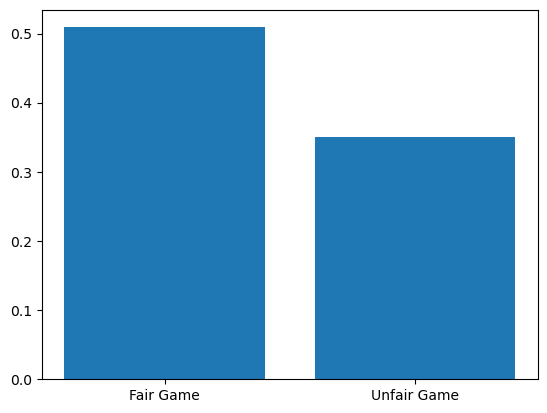

In [44]:
import matplotlib.pyplot as plt

games = ['Fair Game', 'Unfair Game']
rel_freqs = [rel_freq_t2, rel_freq_t3]

plt.bar(games, rel_freqs)
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [45]:
die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die_3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [46]:
unfair_die_num2 = die_2
unfair_die_num2.weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [47]:
unfair_die_num3 = die_3
unfair_die_num3.weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [48]:
fair_game = Game([die_1, die_1, die_1, die_1, die_1])

fair_game.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [49]:
unfair_game = Game([die_1, die_1, die_1, unfair_die_num2, unfair_die_num3])

unfair_game.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

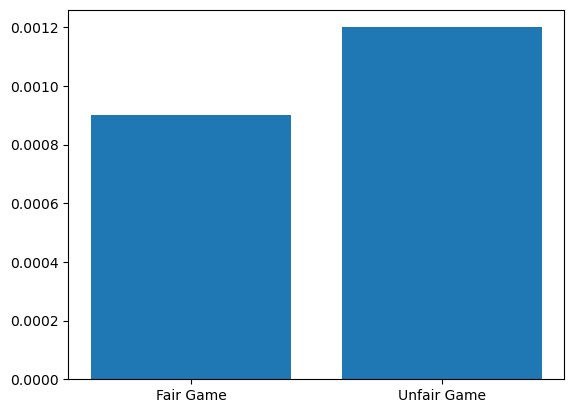

In [50]:
f_analyzer = Analyzer(fair_game)
f_jackpot_freq = f_analyzer.jackpot() / 10000

u_analyzer = Analyzer(unfair_game)
u_jackpot_freq = u_analyzer.jackpot() / 10000


die_games = ['Fair Game', 'Unfair Game']
frequencies = [f_jackpot_freq, u_jackpot_freq]

plt.bar(die_games, frequencies)
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [51]:
import pandas as pd

english = pd.read_csv('english_letters.txt', sep=" ", header = None, names=['letter', 'freq'])
letters = np.array(english['letter'])
wts = np.array(english['freq'])

scenario3_die = Die(letters)

for i in range(len(letters)):
    scenario3_die.weight(letters[i], wts[i])

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [52]:
game_4dice = Game([scenario3_die, scenario3_die, scenario3_die, scenario3_die])
game_4dice.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [53]:
scrabble = pd.read_csv('scrabble_words.txt', header=None, names=['words'])
scrabble_words = set(scrabble['words'])


analyzer_4dice = Analyzer(game_4dice)
perms_4dice = analyzer_4dice.permutation_count()

perm4_words = set(perms_4dice.index.map(''.join))
notwords_4dice = len(perm4_words - scrabble_words)

len(perm4_words) - notwords_4dice

64

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [54]:
game_5dice = Game([scenario3_die, scenario3_die, scenario3_die, scenario3_die, scenario3_die])
game_5dice.play(1000)


analyzer_5dice = Analyzer(game_5dice)
perms_5dice = analyzer_5dice.permutation_count()

perm5_words = set(perms_5dice.index.map(''.join))
notwords_5dice = len(perm5_words - scrabble_words)

len(perm5_words) - notwords_5dice

7

The game with only 4 dice produced more words out of its permutations than the game with 5 dice.